In [312]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd

# Resultados de los Experimentos C vs ASM 
A continuación en en el presente cuaderno se explora todo lo relativo a la experimentación computacional de ORGA2.
- En este archivo se lee el output de los experimentos y grafican los resultados.

In [313]:
df = pd.read_excel("graficos_orga2.xlsx")
df.columns = ['O_ASM', 'O_GCC_O0','O_GCC_O3','O_CLANG_O0' , 'O_CLANG_O3','O_ASM_dqu','D_ASM', 'D_GCC_O0', 'D_GCC_O3','D_CLANG_O0','D_CLANG_O3','D_ASM_dqu','Z_ASM','Z_GCC_O0','Z_GCC_O3','Z_CLANG_O0', 'Z_CLANG_O3', 'Z_CLANG_Ofast']
print('El dataset tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')
df.head()

El dataset tiene 500 filas, y 18 columnas


,O_ASM,O_GCC_O0,O_GCC_O3,O_CLANG_O0,O_CLANG_O3,O_ASM_dqu,D_ASM,D_GCC_O0,D_GCC_O3,D_CLANG_O0,D_CLANG_O3,D_ASM_dqu,Z_ASM,Z_GCC_O0,Z_GCC_O3,Z_CLANG_O0,Z_CLANG_O3,Z_CLANG_Ofast
0,1473040,14565413,3675609,25327228,3527544,1707579,1148244,11152483,2509773,12262448,1705243,969571,628354,12360290,2479095,15694906,2535560,2337765
1,1472748,15031432,3354004,12700610,3233363,1581681,996515,11415366,2501700,11568470,1674912,1230513,588314,12235898,4889044,13876845,2342110,2368082
2,1755627,14076143,3359376,12557400,3215531,1515410,989869,11181797,2495737,11571988,1608085,1125078,600067,11987465,2132371,13778313,2157627,2297501
3,1463987,13992702,3430900,12733322,3205249,1773823,999870,11120344,2496344,11547563,1644850,990653,601683,12229147,2147908,14014068,2148785,2282291
4,1472921,17380830,3619127,12476045,3403246,1679694,982952,11094858,3570571,11652793,1588846,991317,614089,11956053,2123015,13966536,2148057,2312277


# OCULTAR

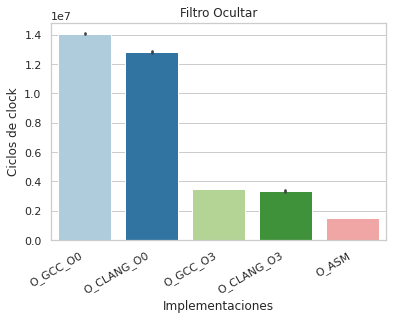

In [319]:
dfo=df[['O_ASM','O_GCC_O0','O_CLANG_O0','O_GCC_O3','O_CLANG_O3']].copy()
#sns.boxplot(x="Implementacion", y="Ciclos de Clock", data=pd.melt(dfo))

sns.barplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['O_ASM','O_GCC_O0','O_GCC_O3','O_CLANG_O0','O_CLANG_O3'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['O_GCC_O0','O_CLANG_O0','O_GCC_O3','O_CLANG_O3','O_ASM'], palette="Paired")
plt.title(F'Filtro Ocultar')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.savefig("graficos/filtro-ocultar-c-vs-asm.png");
plt.show()
#plt.ylabel('Apariciones')
#plt.xlabel(variable)


500


Text(0.5, 1.0, 'Filtro Ocultar')

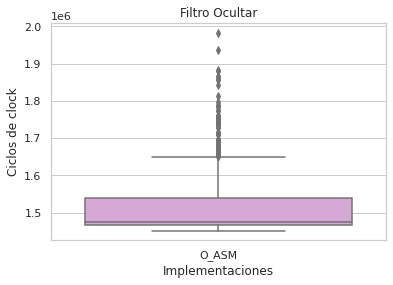

In [227]:
dfo=df[['O_ASM']].where(df.O_ASM <2*(10**6)).copy() #Limpiamos outliers
print(str(df.shape[0]))
sns.boxplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['O_ASM'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['O_ASM'], color="plum")
plt.savefig("graficos/filtro-boxplot-ocultar-c-vs-asm_1.png");
plt.title(F'Filtro Ocultar')

500


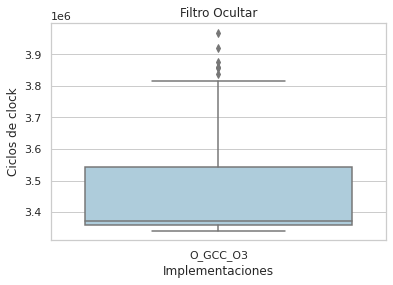

In [233]:
dfo=df[['O_GCC_O3']].where(df.O_GCC_O3 <4*(10**6)).copy() #Limpiamos outliers
print(str(df.shape[0]))
sns.boxplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['O_GCC_O3'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['O_GCC_O3'], palette="Paired")
plt.title(F'Filtro Ocultar')
plt.savefig("graficos/filtro-boxplot-ocultar-c-vs-asm_2.png");

# DESCUBRIR

500


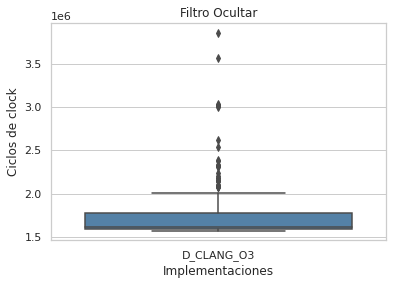

In [326]:
dfo=df[['D_CLANG_O3']].where(df.D_CLANG_O3 <4*(10**6)).copy() #Limpiamos outliers
print(str(df.shape[0]))
sns.boxplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['D_CLANG_O3'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['D_CLANG_O3'], color='steelblue')
plt.title(F'Filtro Ocultar')
plt.savefig("graficos/filtro-boxplot-descubir-c-vs-asm_3.png");

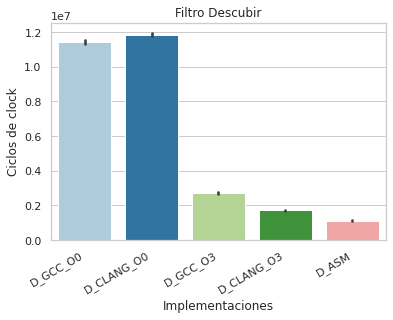

In [320]:
dfo=df[['D_ASM','D_GCC_O0','D_CLANG_O0','D_GCC_O3','D_CLANG_O3']].copy()
#sns.boxplot(x="Implementacion", y="Ciclos de Clock", data=pd.melt(dfo))

sns.barplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['D_ASM','D_GCC_O0','D_GCC_O3','D_CLANG_O0' , 'D_CLANG_O3'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['D_GCC_O0','D_CLANG_O0','D_GCC_O3','D_CLANG_O3','D_ASM'], palette="Paired")
plt.title(F'Filtro Descubir')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.savefig("graficos/filtro-descubir-c-vs-asm.png", bbox_inches='tight');
plt.show()
#plt.ylabel('Apariciones')
#plt.xlabel(variable)

500


Text(0.5, 1.0, 'Filtro Descubrir')

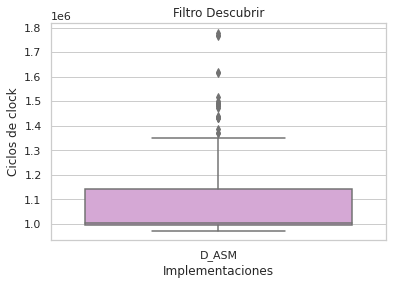

In [247]:
dfo=df[['D_ASM']].where(df.D_ASM <2*(10**6)).copy() #Limpiamos outliers
print(str(df.shape[0]))
sns.boxplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['D_ASM'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['D_ASM'], color="plum")
plt.savefig("graficos/filtro-boxplot-descubrir-c-vs-asm_1.png");
plt.title(F'Filtro Descubrir')

500


Text(0.5, 1.0, 'Filtro Descubrir')

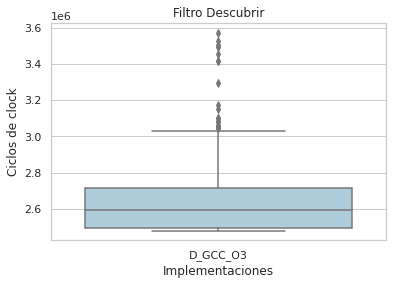

In [248]:
dfo=df[['D_GCC_O3']].where(df.D_GCC_O3 <4*(10**6)).copy() #Limpiamos outliers
print(str(df.shape[0]))
sns.boxplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['D_GCC_O3'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['D_GCC_O3'], palette="Paired")
plt.savefig("graficos/filtro-boxplot-descubrir-c-vs-asm_2.png");
plt.title(F'Filtro Descubrir')

# ZIGZAG

500


Text(0.5, 1.0, 'Filtro Descubrir')

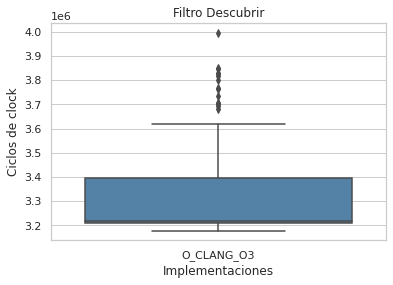

In [249]:
dfo=df[['O_CLANG_O3']].where(df.O_CLANG_O3 <4*(10**6)).copy() #Limpiamos outliers
print(str(df.shape[0]))
sns.boxplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['O_CLANG_O3'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['O_CLANG_O3'], color='steelblue')
plt.savefig("graficos/filtro-boxplot-descubrir-c-vs-asm_3.png");
plt.title(F'Filtro Descubrir')

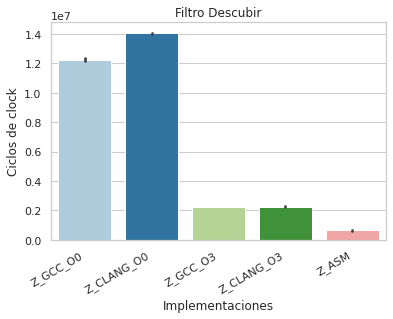

In [253]:
dfo=df[['Z_ASM','Z_GCC_O0','Z_CLANG_O0','Z_GCC_O3','Z_CLANG_O3']].copy()
#sns.boxplot(x="Implementacion", y="Ciclos de Clock", data=pd.melt(dfo))

sns.barplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['Z_ASM','Z_GCC_O0','Z_GCC_O3','Z_CLANG_O0' , 'Z_CLANG_O3'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['Z_GCC_O0','Z_CLANG_O0','Z_GCC_O3','Z_CLANG_O3','Z_ASM'], palette="Paired")
plt.title(F'Filtro Descubir')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.savefig("graficos/filtro-zigzag-c-vs-asm.png", bbox_inches='tight');
plt.show()
#plt.ylabel('Apariciones')
#plt.xlabel(variable)


500


Text(0.5, 1.0, 'Filtro Zigzag')

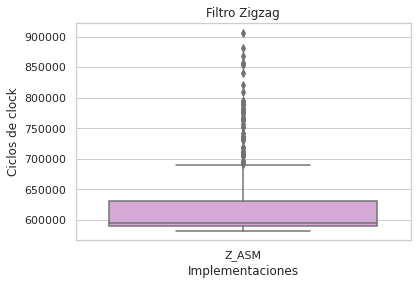

In [256]:
dfo=df[['Z_ASM']].where(df.Z_ASM <(10**6)).copy() #Limpiamos outliers
print(str(df.shape[0]))
sns.boxplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['Z_ASM'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['Z_ASM'], color="plum")
plt.savefig("graficos/filtro-boxplot-zigzag-c-vs-asm_1.png");
plt.title(F'Filtro Zigzag')

500


Text(0.5, 1.0, 'Filtro Zigzag')

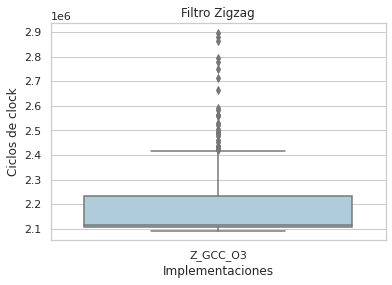

In [259]:
dfo=df[['Z_GCC_O3']].where(df.Z_GCC_O3 <3*(10**6)).copy() #Limpiamos outliers
print(str(df.shape[0]))
sns.boxplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['Z_GCC_O3'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['Z_GCC_O3'], palette="Paired")
plt.savefig("graficos/filtro-boxplot-zigzag-c-vs-asm_2.png");
plt.title(F'Filtro Zigzag')

500


Text(0.5, 1.0, 'Filtro Zigzag')

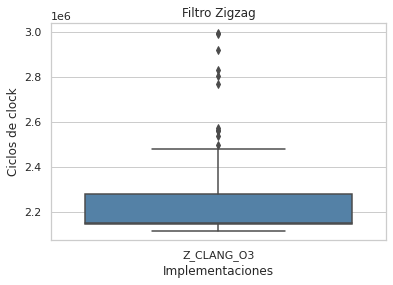

In [261]:
dfo=df[['Z_CLANG_O3']].where(df.Z_CLANG_O3 <3*(10**6)).copy() #Limpiamos outliers
print(str(df.shape[0]))
sns.boxplot(x="Implementaciones", y="Ciclos de clock", data=pd.melt(dfo, value_vars=['Z_CLANG_O3'], var_name='Implementaciones', value_name='Ciclos de clock'), order = ['Z_CLANG_O3'], color='steelblue')
plt.savefig("graficos/filtro-boxplot-zigzag-c-vs-asm_3.png");
plt.title(F'Filtro Zigzag')

# COMPARACION FILTROS

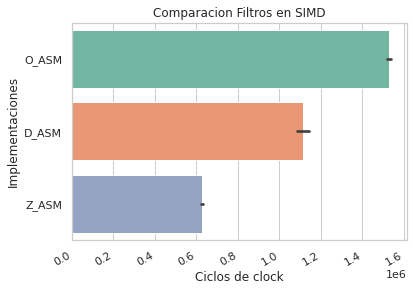

In [273]:
dfo=df[['O_ASM','D_ASM','Z_ASM']].copy()
#sns.boxplot(x="Implementacion", y="Ciclos de Clock", data=pd.melt(dfo))
sns.barplot(y="Implementaciones", x="Ciclos de clock", data=pd.melt(dfo, var_name='Implementaciones', value_name='Ciclos de clock'),palette="Set2", orient = 'h')
plt.title(F'Comparacion Filtros en SIMD')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.savefig("graficos/filtro-comparativo-asm.png", bbox_inches='tight');
plt.show()\
# = sns.barplot(x='totalCount', y='name', data=df)
#ax.set_xlabel('Ciclos de clock')

# COMPARATIVO ALINEACION

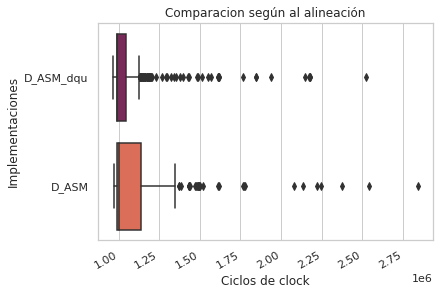

In [306]:
dfo=df[['D_ASM_dqu','D_ASM']].where(df.D_ASM_dqu <3*(10**6)).where(df.D_ASM <3*(10**6)).copy()
#sns.boxplot(x="Implementacion", y="Ciclos de Clock", data=pd.melt(dfo))
sns.boxplot(y="Implementaciones", x="Ciclos de clock", data=pd.melt(dfo, var_name='Implementaciones', value_name='Ciclos de clock'),palette="rocket", orient = 'h')
plt.title(F'Comparacion según al alineación')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.savefig("graficos/filtro-comparativo-D-box-alineacion-asm.png", bbox_inches='tight');
plt.show()\
# = sns.barplot(x='totalCount', y='name', data=df)
#ax.set_xlabel('Ciclos de clock')

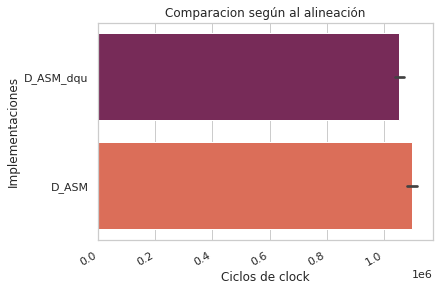

In [303]:
dfo=df[['D_ASM_dqu','D_ASM']].where(df.D_ASM_dqu <3*(10**6)).where(df.D_ASM <3*(10**6)).copy()
#sns.boxplot(x="Implementacion", y="Ciclos de Clock", data=pd.melt(dfo))
sns.barplot(y="Implementaciones", x="Ciclos de clock", data=pd.melt(dfo, var_name='Implementaciones', value_name='Ciclos de clock'),palette="rocket", orient = 'h')
plt.title(F'Comparacion según al alineación')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.savefig("graficos/filtro-comparativo-D-alineacion-asm.png", bbox_inches='tight');
plt.show()\
# = sns.barplot(x='totalCount', y='name', data=df)
#ax.set_xlabel('Ciclos de clock')

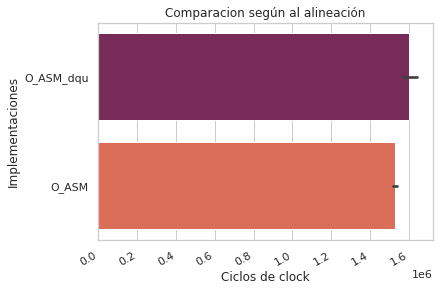

In [305]:
dfo=df[['O_ASM_dqu','O_ASM']].copy()
#sns.boxplot(x="Implementacion", y="Ciclos de Clock", data=pd.melt(dfo))
sns.barplot(y="Implementaciones", x="Ciclos de clock", data=pd.melt(dfo, var_name='Implementaciones', value_name='Ciclos de clock'),palette="rocket", orient = 'h')
plt.title(F'Comparacion según al alineación')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.savefig("graficos/filtro-comparativo-O-alineacion-asm.png", bbox_inches='tight');
plt.show()\
# = sns.barplot(x='totalCount', y='name', data=df)
#ax.set_xlabel('Ciclos de clock')

In [330]:
data5=pd.melt(df, value_vars=['O_ASM','O_GCC_O0','O_GCC_O3','O_CLANG_O0','O_CLANG_O3'], var_name='Implementaciones', value_name='Ciclos de clock')
data5.head()

,Implementaciones,Ciclos de clock
0,O_ASM,1473040
1,O_ASM,1472748
2,O_ASM,1755627
3,O_ASM,1463987
4,O_ASM,1472921
